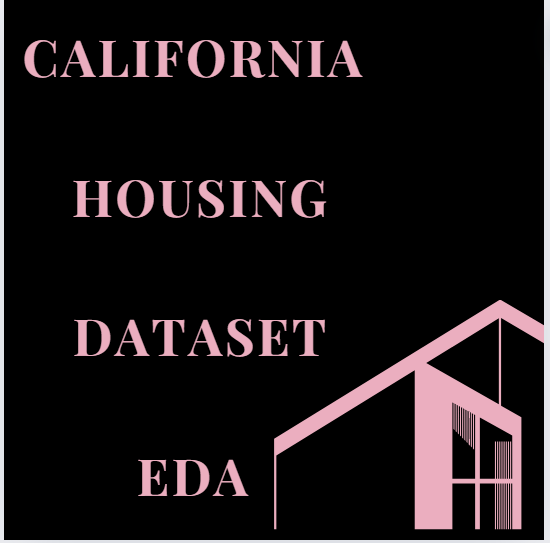

# Importing all required libs

In [6]:
import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset  = pd.read_csv('housing.csv')
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<h1 style="text-align:center; background-color: lightblue; color: black"> Understanding the Data </h1>



In [8]:
dataset.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
dataset.shape

(20640, 10)

In [11]:
20640-20433

207

In [12]:
dataset['ocean_proximity'].nunique()

5

In [13]:
dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
dataset['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h3 style="text-align:center; background-color: lightblue; color: black"> Plotting Numerical Attributes </h3>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

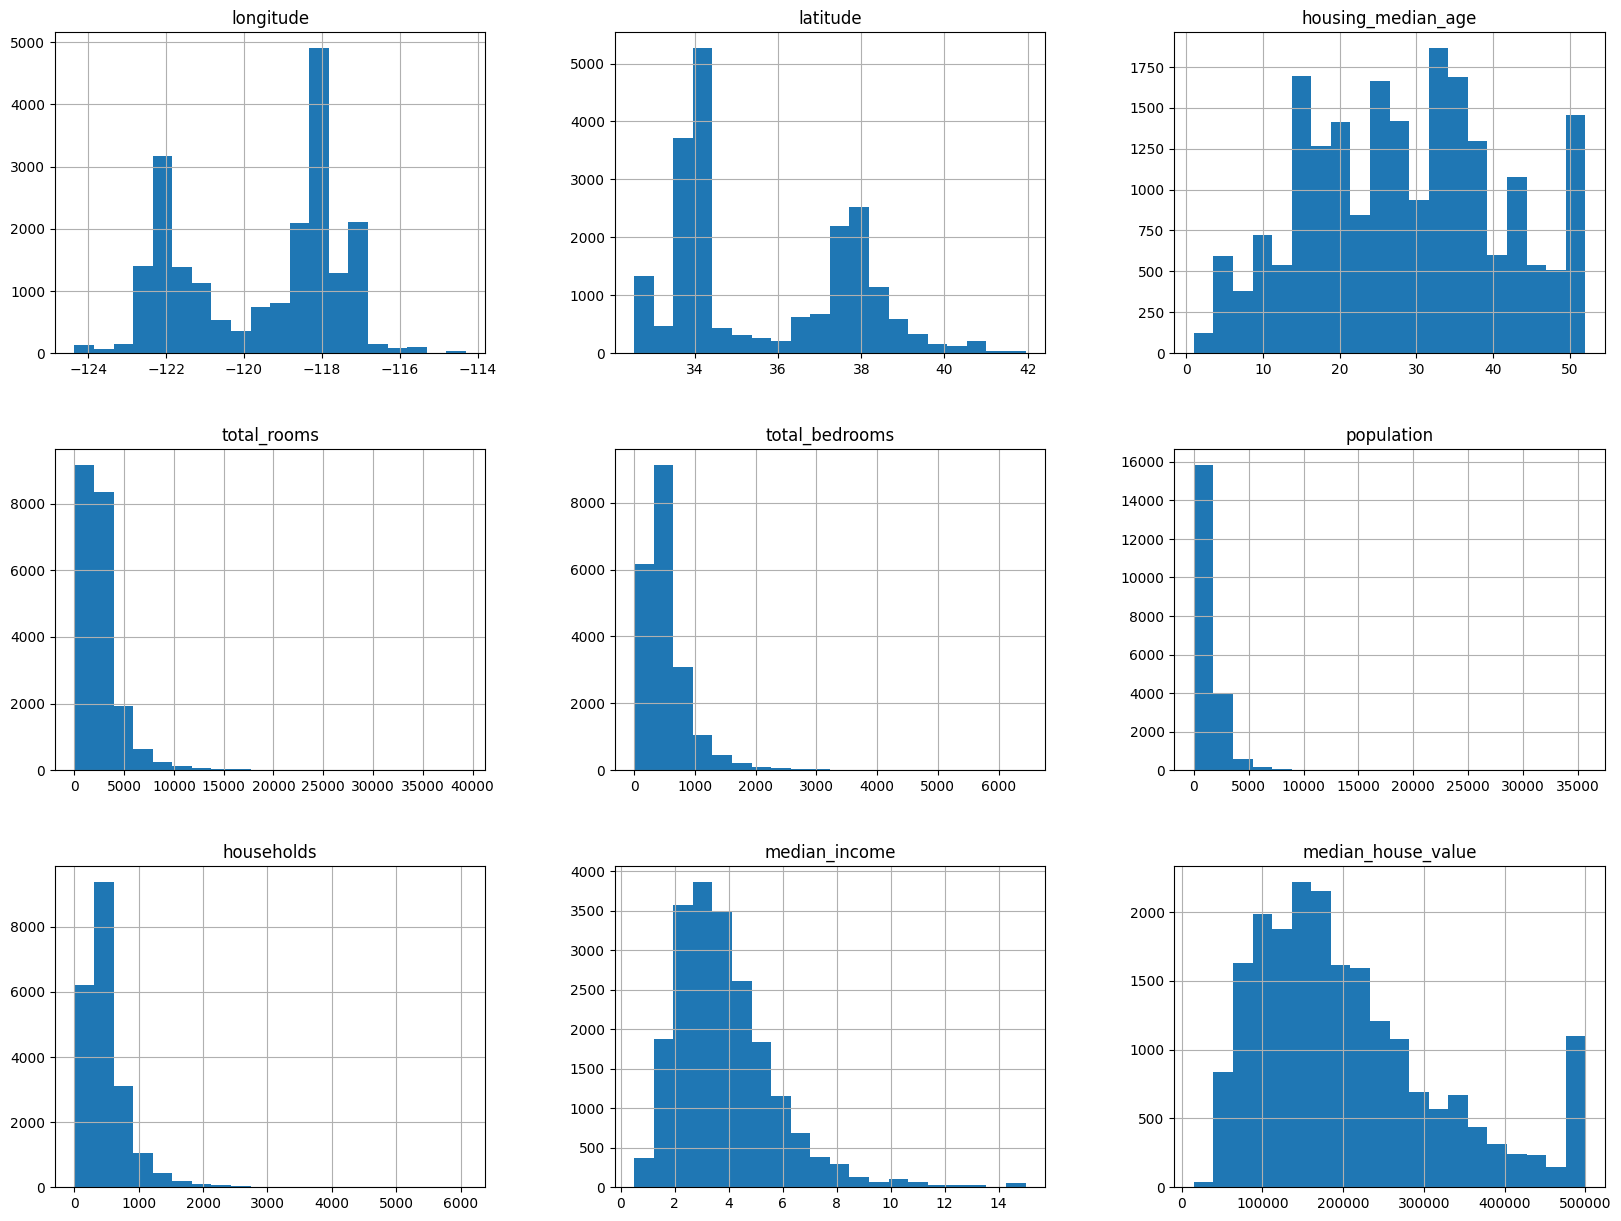

In [16]:
dataset.hist(bins=20, figsize=(20,15))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

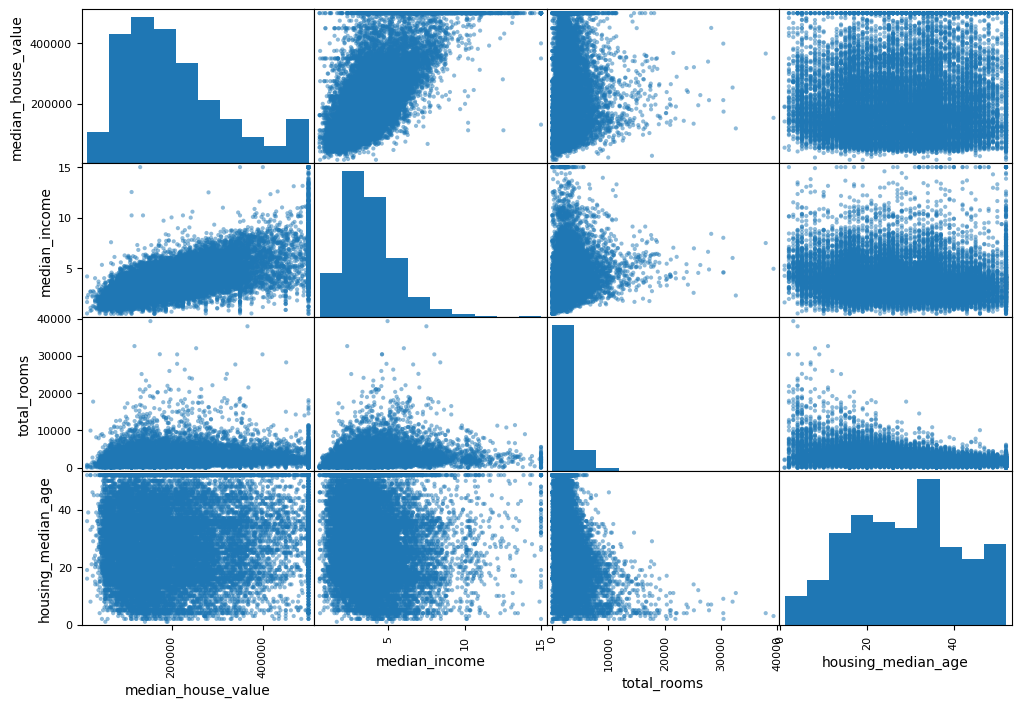

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

<h1 style="text-align:center; background-color: lightblue; color: black"> Correlation </h1>

Finding out the correlation of 'median_income' with each of the other columns.

.corr() outputs a Series Object

In [18]:
dataset.drop('ocean_proximity',axis = 1).corr()['median_income']
# dataset.iloc[:,:-1].corr()
#.corr only runs for numerical attributes


longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
total_rooms           0.198050
total_bedrooms       -0.007723
population            0.004834
households            0.013033
median_income         1.000000
median_house_value    0.688075
Name: median_income, dtype: float64

Values closer to 1 and -1 have a higher correlation.

median_house_value = 0.6 

housing_median_age = 0.11

total_rooms = 0.19

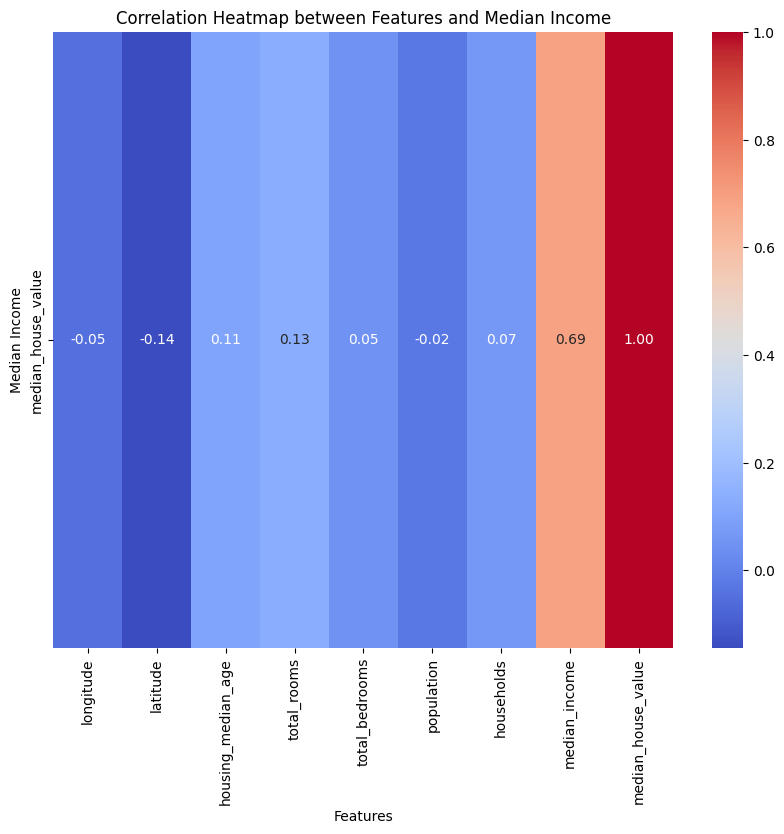

In [19]:
# Drop 'ocean_proximity' column and compute correlation with 'median_income'
correlation = dataset.drop('ocean_proximity', axis=1).corr()['median_house_value']

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame().transpose(), cmap='coolwarm', annot=True, fmt=".2f")

plt.title('Correlation Heatmap between Features and Median Income')
plt.xlabel('Features')
plt.ylabel('Median Income')
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

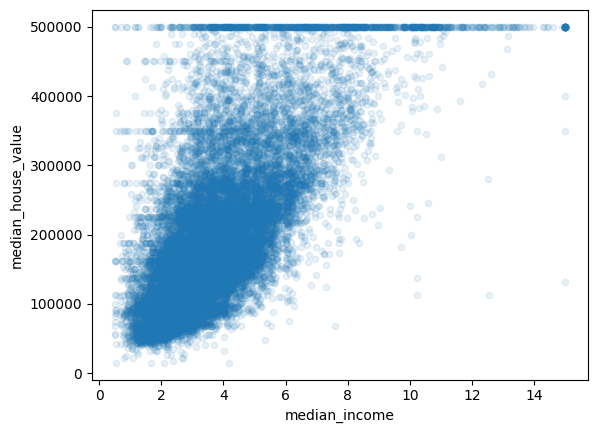

In [20]:
dataset.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

Visible Horizontal Lines can be noticed at:

$500,000

$450,000

$350,000

In [21]:
# dataset.plot(dataset['ocean_proximity'].value_counts().index, dataset['ocean_proximity'].value_counts(),type='bar')

In [22]:
# shuffled_indices = np.random.permutation(len(dataset))
# train_indices = shuffled_indices[:round(0.8*len(dataset))]
# test_indices = shuffled_indices[train_indices:)]


<h1 style="text-align:center; background-color: lightblue; color: black"> Our own train_test_split Method </h1>

In [23]:
def my_train_test_split_(ds,test_ratio):
    shuffled_indices = np.random.permutation(len(ds))
    train_ratio = 1-test_ratio
    train_size = round(train_ratio*len(ds))
    # test_size = round(test_ratio * len(ds))
    
    train_set= ds.iloc[shuffled_indices[:train_size]]
    #shuffling random datapoints
    #iloc = integer location based indexing, indexing by position

    test_set= ds.iloc[shuffled_indices[train_size:]]

    return train_set, test_set
    
    

<Axes: xlabel='ocean_proximity'>

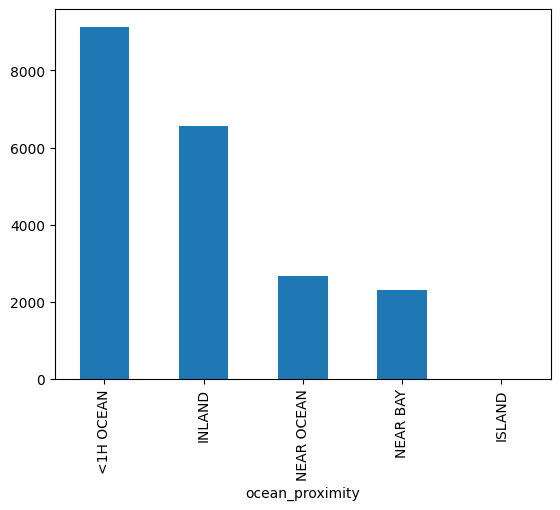

In [24]:
dataset['ocean_proximity'].value_counts().plot.bar()


<h2 style="text-align:center; background-color: lightblue; color: black"> Dividing Median Income into Ranges </h2>

<h5 style="text-align:center; background-color: lightblue; color: black">Categorizing a Numerical Attribute</h5>

<Axes: >

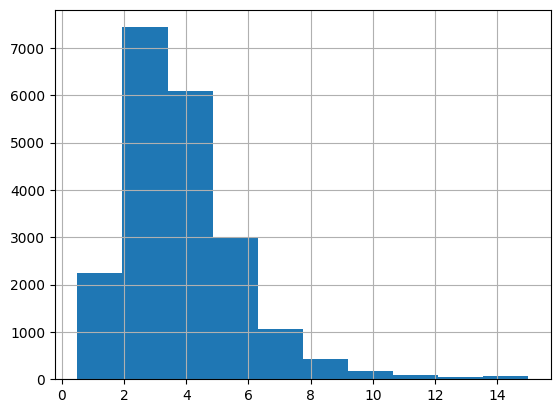

In [25]:
dataset['median_income'].hist()

In [26]:
dataset['median_income'].max(),dataset['median_income'].min()

(15.0001, 0.4999)

In [27]:
dataset['income_category']= pd.cut(dataset['median_income'], bins = [0,2,3,4.5,6.2,11,np.inf], labels = [1,2,3,4,5,6])

#dataset['income_category'] = for a column with numerical attributes

#pd.cut = Its used to segment and categorize numerical data into discrete bins.

#Each bin represents a range of incomes

#labels = this parameter assigns labels to each of the bins.

In [28]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: xlabel='income_category'>

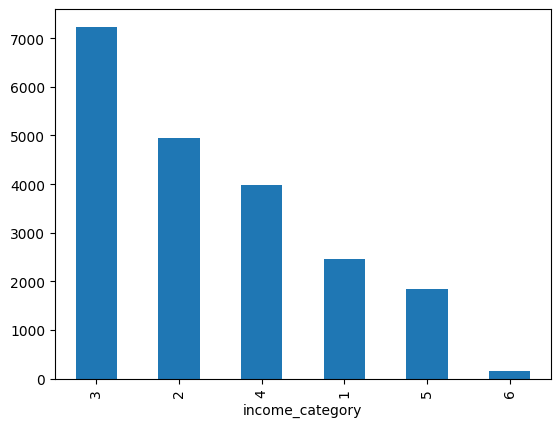

In [29]:
dataset['income_category'].value_counts().plot.bar()

In [30]:
dataset['income_category'].value_counts(normalize = True)

income_category
3    0.350581
2    0.239632
4    0.193411
1    0.119041
5    0.089680
6    0.007655
Name: proportion, dtype: float64

<h1 style="text-align:center; background-color: lightblue; color: black"> Visualizing Geographical Data</h1>

<Axes: xlabel='longitude', ylabel='latitude'>

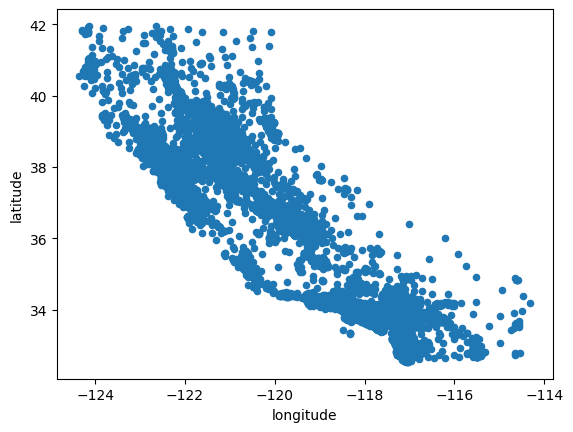

In [31]:
dataset.plot(kind="scatter", x="longitude", y="latitude")

The above map looks like the map of California, but fails to vizualizes the place where there is a high density of data points. 

<Axes: xlabel='longitude', ylabel='latitude'>

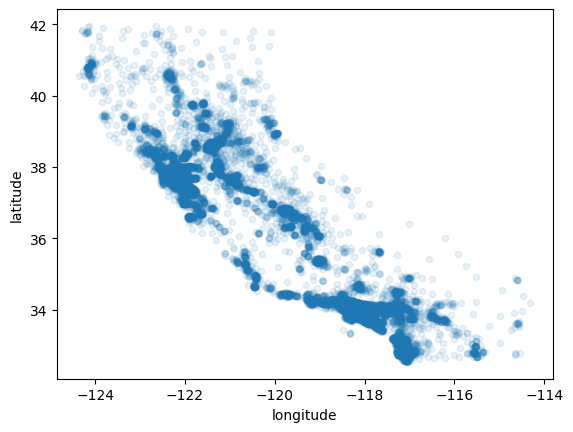

In [32]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The above map gives a better idea of density.

A line of fairly high density in the center.

The radius of each circle represents the district's population.

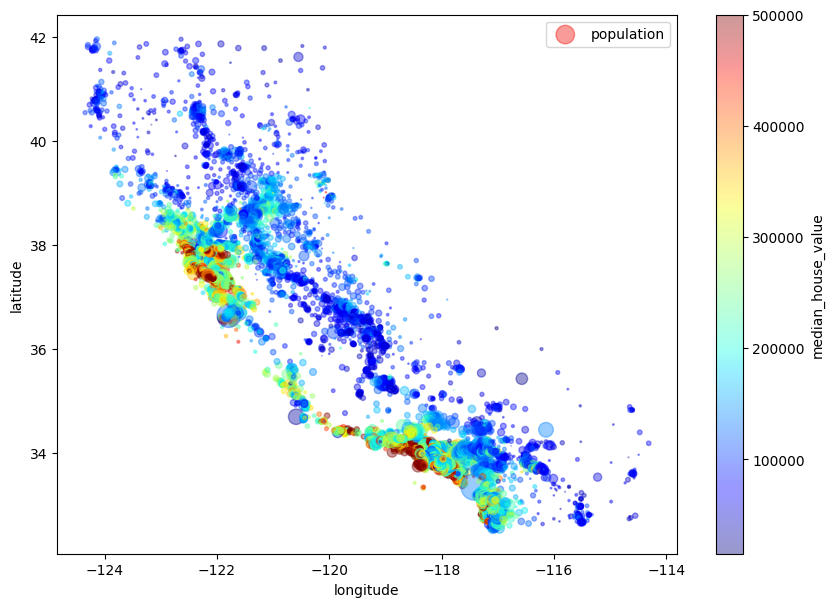

In [33]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             
s=dataset["population"]/100, label="population", figsize=(10,7),

c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The radius of each circle represents the district's population, and the color represents the price.
We are using a <span style="color:yellow;">pre-defined color map (option cmap) called jet,</span> which ranges from blue (low values) to red (high prices).



<h1 style="text-align:center; background-color: lightblue; color: black">Stratified Splitting</h1>

This involves dividing a dataset into subsets such that the <span style = "color:yellow"> proportion of classes within  each subset <span> closely matches the proportion of classes in the orignal dataset.

This ensures that the test set is represeentative of the various categories of incomes in the whole dataset.

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


The test set generated using Stratified Sampling has:

-Income category proportions almost identical to those in the full dataset,

-Whereas test set is generated using purely random sampling is quite skewed.

In [35]:
type(strat_split.split(dataset, dataset["income_category"]))

generator

In [36]:
indexLists = next(strat_split.split(dataset, dataset["income_category"]))
indexLists

(array([10237,  1290, 11221, ..., 16080, 16365,  6888], dtype=int64),
 array([17428, 15123, 14508, ..., 10778,  9836,  6748], dtype=int64))

In [37]:
trainIndices = indexLists[0]
trainIndices

array([10237,  1290, 11221, ..., 16080, 16365,  6888], dtype=int64)

In [38]:
testIndices = indexLists[1]
testIndices

array([17428, 15123, 14508, ..., 10778,  9836,  6748], dtype=int64)

In [39]:
strat_trainSet = dataset.iloc[trainIndices]
strat_testSet = dataset.iloc[testIndices]

In [40]:
strat_trainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,3
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,3
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,3
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,5
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,2


In [41]:
strat_trainSet.shape,strat_testSet.shape

((16512, 11), (4128, 11))

In [42]:
strat_testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN,3
15123,-116.94,32.83,38.0,1701.0,317.0,872.0,304.0,3.7831,147800.0,<1H OCEAN,3
14508,-117.20,32.86,4.0,4308.0,1095.0,1923.0,932.0,3.9356,267000.0,NEAR OCEAN,3
12599,-121.49,38.53,42.0,1468.0,281.0,571.0,271.0,3.3906,124200.0,INLAND,3
9001,-118.34,33.99,47.0,1107.0,199.0,437.0,178.0,3.7344,179400.0,<1H OCEAN,3


In [43]:
strat_testSet["income_category"].value_counts()/len(strat_testSet)

income_category
3    0.350533
2    0.239583
4    0.193314
1    0.119186
5    0.089632
6    0.007752
Name: count, dtype: float64

In [44]:
dataset["income_category"].value_counts()/len(dataset)

income_category
3    0.350581
2    0.239632
4    0.193411
1    0.119041
5    0.089680
6    0.007655
Name: count, dtype: float64

In [45]:
trainSet_Normal, testSet_Normal  = my_train_test_split_(dataset,0.2)

In [46]:
trainSet_Normal.shape

(16512, 11)

In [47]:
trainSet_Normal["income_category"].value_counts()/len(trainSet_Normal)

income_category
3    0.348958
2    0.239281
4    0.195010
1    0.119973
5    0.088844
6    0.007934
Name: count, dtype: float64

In [48]:
for ds in (strat_trainSet, strat_testSet):
    ds.drop("income_category", axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\1345930727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop("income_category", axis=1, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\1345930727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop("income_category", axis=1, inplace=True)



<h2 style="text-align:center; background-color: lightblue; color: black"> Dealing with Categorical Features(columns) </h2>

In [49]:
strat_trainSet['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [50]:
strat_trainSet_cat = strat_trainSet['ocean_proximity']
# strat_trainSet_cat = np.array(strat_trainSet_cat)


In [51]:
strat_trainSet_cat

10237     <1H OCEAN
1290         INLAND
11221     <1H OCEAN
20394     <1H OCEAN
7336      <1H OCEAN
            ...    
14632    NEAR OCEAN
8945      <1H OCEAN
16080    NEAR OCEAN
16365        INLAND
6888      <1H OCEAN
Name: ocean_proximity, Length: 16512, dtype: object

In [52]:
strat_trainSet_cat.shape

(16512,)

In [53]:
np.array(strat_trainSet_cat).reshape(-1,1)

array([['<1H OCEAN'],
       ['INLAND'],
       ['<1H OCEAN'],
       ...,
       ['NEAR OCEAN'],
       ['INLAND'],
       ['<1H OCEAN']], dtype=object)

Ordinal Encoding is used when the data follows a certain order, whereas One-Hot Encoding can be applied to data which doesn't have an order.

In [54]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()



strat_trainSet_cat_ord = ordinal_encoder.fit_transform(np.array(strat_trainSet_cat).reshape(-1,1))
strat_trainSet_cat_ord[:10],strat_trainSet_cat[:10]

(array([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [4.],
        [0.],
        [0.]]),
 10237     <1H OCEAN
 1290         INLAND
 11221     <1H OCEAN
 20394     <1H OCEAN
 7336      <1H OCEAN
 19603        INLAND
 12934        INLAND
 15359    NEAR OCEAN
 17757     <1H OCEAN
 5301      <1H OCEAN
 Name: ocean_proximity, dtype: object)

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

strat_trainSet_cat_oneHot = cat_encoder.fit_transform(np.array(strat_trainSet_cat).reshape(-1,1))

strat_trainSet_cat_oneHot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [56]:
strat_trainSet_cat_oneHot[:10].toarray(),strat_trainSet_cat[:10]

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 10237     <1H OCEAN
 1290         INLAND
 11221     <1H OCEAN
 20394     <1H OCEAN
 7336      <1H OCEAN
 19603        INLAND
 12934        INLAND
 15359    NEAR OCEAN
 17757     <1H OCEAN
 5301      <1H OCEAN
 Name: ocean_proximity, dtype: object)

In [57]:
cat_encoder.categories_[0]
strat_trainSet[cat_encoder.categories_[0]] = strat_trainSet_cat_oneHot.toarray()
strat_trainSet.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\3405532138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[cat_encoder.categories_[0]] = strat_trainSet_cat_oneHot.toarray()
C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\3405532138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[cat_encoder.categories_[0]] = strat_trainSet_cat_oneHot.toarray()
C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\3405532138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a co

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0


In [58]:
strat_trainSet.drop("ocean_proximity", axis=1,inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\3614202046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet.drop("ocean_proximity", axis=1,inplace=True)


In [59]:
strat_trainSet.shape

(16512, 14)

<h2 style="text-align:center; background-color: lightblue; color: black"> Dealing with Missing Values </h2>

In [60]:
strat_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 10237 to 6888
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   <1H OCEAN           16512 non-null  float64
 10  INLAND              16512 non-null  float64
 11  ISLAND              16512 non-null  float64
 12  NEAR BAY            16512 non-null  float64
 13  NEAR OCEAN          16512 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


In [61]:
16512-16347

165

In [62]:
temp = strat_trainSet.isna()

isna_index = (temp[temp['total_bedrooms']==True]).index

In [63]:
strat_trainSet.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        165
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [64]:
temp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1290,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11221,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20394,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7336,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16365,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
isna_index

Index([ 6253,  6541, 13656,  4743, 15607, 20460, 10216, 10033, 12101, 14015,
       ...
       19122, 13933,  8383,  3482, 20372, 18332, 10761,  7228,  9970,  5216],
      dtype='int64', length=165)

In [66]:
strat_trainSet.loc[isna_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,1.0,0.0,0.0,0.0,0.0
6541,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,1.0,0.0,0.0,0.0,0.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,0.0,1.0,0.0,0.0,0.0
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,202100.0,1.0,0.0,0.0,0.0,0.0
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,240600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,425000.0,0.0,0.0,0.0,1.0,0.0
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,1.0,0.0,0.0,0.0,0.0
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,1.0,0.0,0.0,0.0,0.0
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,276500.0,0.0,1.0,0.0,0.0,0.0


In [67]:
strat_trainSet[strat_trainSet.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,1.0,0.0,0.0,0.0,0.0
6541,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,1.0,0.0,0.0,0.0,0.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,0.0,1.0,0.0,0.0,0.0
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,202100.0,1.0,0.0,0.0,0.0,0.0
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,240600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,425000.0,0.0,0.0,0.0,1.0,0.0
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,1.0,0.0,0.0,0.0,0.0
7228,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,1.0,0.0,0.0,0.0,0.0
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,276500.0,0.0,1.0,0.0,0.0,0.0


In [68]:
#strat_trainSet.dropna() # Drops all Nan rows

In [69]:
# strat_trainSet.dropna(axis=1) # Drops all Nan columns

In [70]:
strat_trainSet["total_bedrooms"].dropna() # Drops one Nan column

10237    455.0
1290     593.0
11221    397.0
20394    451.0
7336     290.0
         ...  
14632    912.0
8945     471.0
16080    449.0
16365    951.0
6888     436.0
Name: total_bedrooms, Length: 16347, dtype: float64

In [99]:
strat_trainSet.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [72]:
median = strat_trainSet["total_bedrooms"].median()

strat_trainSet["total_bedrooms"].fillna(median, inplace = True)
strat_trainSet.loc[isna_index]

C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\1476230052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  strat_trainSet["total_bedrooms"].fillna(median, inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\1476230052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet["total_bedrooms"].fillna(median, inplace =

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6253,-117.96,34.03,35.0,2093.0,433.0,1755.0,403.0,3.4115,150400.0,1.0,0.0,0.0,0.0,0.0
6541,-118.05,34.04,33.0,1348.0,433.0,1098.0,257.0,4.2917,161200.0,1.0,0.0,0.0,0.0,0.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0,0.0,1.0,0.0,0.0,0.0
4743,-118.36,34.05,42.0,1372.0,433.0,674.0,271.0,2.8793,202100.0,1.0,0.0,0.0,0.0,0.0
15607,-116.66,32.79,13.0,843.0,433.0,918.0,152.0,6.2152,240600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,-122.16,37.45,47.0,4234.0,433.0,1808.0,1093.0,4.2297,425000.0,0.0,0.0,0.0,1.0,0.0
10761,-117.87,33.62,8.0,1266.0,433.0,375.0,183.0,9.8020,500001.0,1.0,0.0,0.0,0.0,0.0
7228,-118.16,34.01,40.0,1552.0,433.0,1919.0,427.0,2.2596,137500.0,1.0,0.0,0.0,0.0,0.0
9970,-122.48,38.50,37.0,3049.0,433.0,1287.0,439.0,4.3125,276500.0,0.0,1.0,0.0,0.0,0.0


<h2 style="text-align:center; background-color: lightblue; color: black">Feature Scaling</h2>

Applied when the numerical attributes have very different scales.

The two ways to do this is:
1. Min - Max Scaling (Normalization)
2. Standardization

In [73]:
strat_trainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,0.0,1.0,0.0,0.0,0.0
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789,350000.0,1.0,0.0,0.0,0.0,0.0
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,1.0,0.0,0.0,0.0,0.0
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000,165600.0,1.0,0.0,0.0,0.0,0.0


In [74]:
strat_trainSet.columns[:8]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [75]:
strat_trainSet_numeric = strat_trainSet[strat_trainSet.columns[:8]]
strat_trainSet_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10237,-117.87,33.91,16.0,2434.0,455.0,1017.0,476.0,4.2188
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118
11221,-117.90,33.80,23.0,1368.0,397.0,1940.0,358.0,3.0789
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423
7336,-118.15,33.98,37.0,1184.0,290.0,1320.0,276.0,2.3000


<h4  style="color:lightblue"> MinMax Scaling  </h4>

Values are shifted and rescaled, so that they end up ranging from 0 to 1. 

Done by subtracting the min value and dividing by the max minus the min.

It has a feature range hyperparamter that lets you change the range, from 0-1 for some reason.

In [76]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(strat_trainSet_numeric)
normalized = normalizer.transform(strat_trainSet_numeric)
normalized[:5]

array([[0.65587045, 0.1455898 , 0.29411765, 0.06185462, 0.07311967,
        0.06220096, 0.08866903, 0.25647232],
       [0.25910931, 0.58023379, 0.64705882, 0.07853909, 0.09534547,
        0.09722733, 0.10546948, 0.21461083],
       [0.65283401, 0.13390011, 0.43137255, 0.03474236, 0.06377839,
        0.11881978, 0.06664178, 0.17785962],
       [0.55465587, 0.17853348, 0.25490196, 0.0789969 , 0.07247544,
        0.09587781, 0.08082882, 0.39602212],
       [0.62753036, 0.15302869, 0.70588235, 0.03006257, 0.04654534,
        0.08078763, 0.0513347 , 0.12414312]])

In [77]:
# strat_trainSet_norm = pd.DataFrame(normalized , columns = strat_trainSet.columns[:8] , index = strat_trainSet.index)
# strat_trainSet_norm

In [78]:
# strat_trainSet[strat_trainSet.columns[:8]] = strat_trainSet_norm
# strat_trainSet.head()

<h4 style="color:lightblue"> Standard Scaling </h4>

- done by  subtracting the mean value, so standardized values always have a zero mean

-and then it divides by the std. deviation, so that the resulting distribution has unit variance.

-not affected by outliers

-done by a transformer called StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(strat_trainSet_numeric)
standardized = standardizer.transform(strat_trainSet_numeric)
standardized[:5]

array([[ 0.8568401 , -0.81341049, -1.00539266, -0.08842458, -0.19172699,
        -0.36987978, -0.0573486 ,  0.18360453],
       [-1.0965938 ,  1.09618024,  0.4273443 ,  0.21736562,  0.14220396,
         0.15400624,  0.18053023, -0.13593062],
       [ 0.84189035, -0.86476867, -0.44821717, -0.58533365, -0.33207478,
         0.47696224, -0.36923419, -0.41645825],
       [ 0.35851512, -0.66867378, -1.16458565,  0.22575621, -0.20140615,
         0.13382149, -0.16835873,  1.2488094 ],
       [ 0.71730911, -0.78072801,  0.6661338 , -0.67110407, -0.59099226,
        -0.09188072, -0.58596824, -0.82648448]])

In [80]:
strat_trainSet_std = pd.DataFrame(standardized , columns = strat_trainSet.columns[:8] , index = strat_trainSet.index)
strat_trainSet_std
strat_trainSet_std['total_rooms'].mean()

2.1193210838290295e-17

In [81]:
strat_trainSet[strat_trainSet.columns[:8]] = strat_trainSet_std
strat_trainSet.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\4209387829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_trainSet[strat_trainSet.columns[:8]] = strat_trainSet_std


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10237,0.856840,-0.813410,-1.005393,-0.088425,-0.191727,-0.369880,-0.057349,0.183605,176300.0,1.0,0.0,0.0,0.0,0.0
1290,-1.096594,1.096180,0.427344,0.217366,0.142204,0.154006,0.180530,-0.135931,124700.0,0.0,1.0,0.0,0.0,0.0
11221,0.841890,-0.864769,-0.448217,-0.585334,-0.332075,0.476962,-0.369234,-0.416458,350000.0,1.0,0.0,0.0,0.0,0.0
20394,0.358515,-0.668674,-1.164586,0.225756,-0.201406,0.133821,-0.168359,1.248809,305400.0,1.0,0.0,0.0,0.0,0.0
7336,0.717309,-0.780728,0.666134,-0.671104,-0.590992,-0.091881,-0.585968,-0.826484,165600.0,1.0,0.0,0.0,0.0,0.0


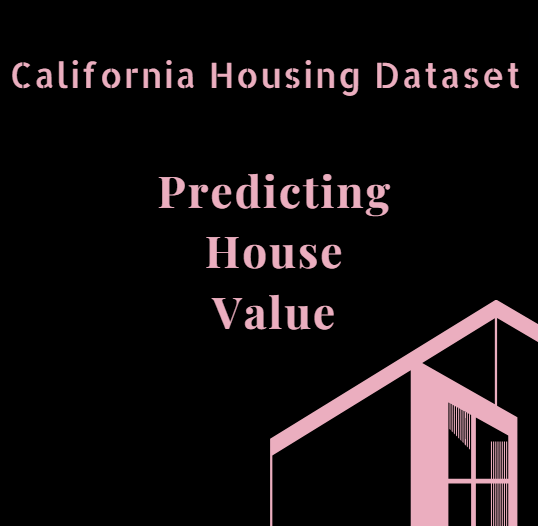

<h1 style="text-align:center; background-color: lightblue; color: black"> ML Algorithms </h1>

<h2 style="color:lightblue"> Estimators </h2>

-done by the fit() method

-An object that can estimate some parameters based on a dataset.

-This takes dataset as a parameter.
-For supervised ML algorithms = it takes two, dataset and labels.

<h2 style="color:lightblue"> Transformer </h2>

-done by the transformer() method

-Any other parameter that guides the estimation process is considered a hyperparameter(generally via a constructor parameter).

-This transformation generally relies on the learned parameters, as in the case of imputers.

- done by the fit_transform() = equivalent to calling fit() then transform()

<h2 style="color:lightblue"> Predictors </h2>

-done by the predict() method

- a score() method measures the quality of these predictions

-Estimators are capable of making predictions given a dataset.

<h4  style="text-align:center; background-color: lightblue; color: black">Linear Regression  </h4>

<b>The basic aim of regression is to : </b>

Quantify the relationships between dependent(price of the house) and independent variables(no. of rooms, median_age, location), 

So that we can predict the future values of the dependent variable.

<b>Done for : </b>

Continuous Numerical Attribute

Discrete Categorical Attribute

<b>A linear model makes a prediction by simply computing a :</b>

-Weighted sum of the Input Features(wx),

-plus a constant called the Bias Term (b)(Intercept)

#LINEAR REGRESSION MODEL PREDICTION
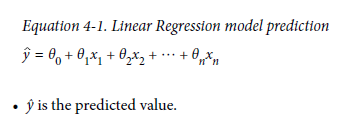
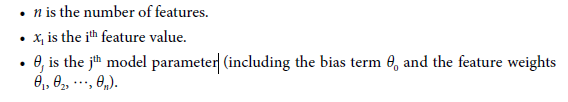

#VECTOR FORM
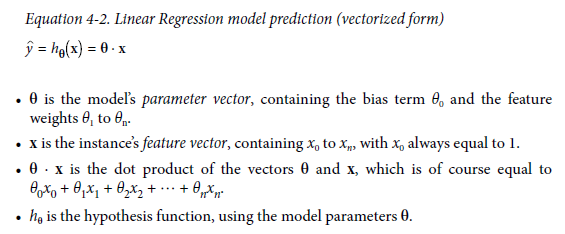

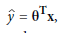

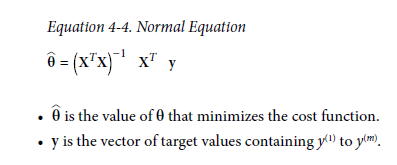

#mse
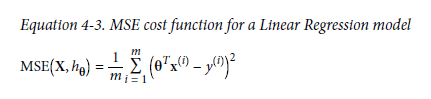

In [82]:
from sklearn.linear_model import LinearRegression

X = strat_trainSet.drop("median_house_value",axis=1)
y = strat_trainSet["median_house_value"]

lin_reg = LinearRegression()
lin_reg.fit(X, y )


LinearRegression()

In [83]:
y_pred = lin_reg.predict(X)

In [84]:
y_pred,y

(array([229340.20248966, 175410.14313168, 145051.29529851, ...,
        292385.1920959 , 117038.24836439, 148143.69859392]),
 10237    176300.0
 1290     124700.0
 11221    350000.0
 20394    305400.0
 7336     165600.0
            ...   
 14632    200000.0
 8945     413000.0
 16080    317700.0
 16365     92100.0
 6888     187500.0
 Name: median_house_value, Length: 16512, dtype: float64)

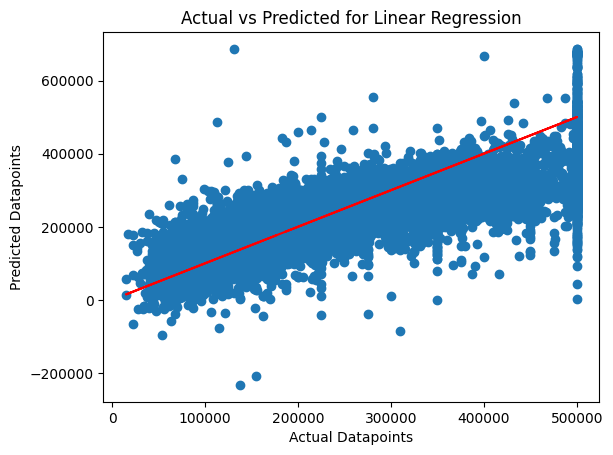

In [85]:

plt.scatter(y, y_pred)
plt.plot(y, y, 'r-') 
#plotting the Ground Truth Values

plt.xlabel('Actual Datapoints')
plt.ylabel('Predicted Datapoints')

plt.title('Actual vs Predicted for Linear Regression')
plt.show()


<h1 style="text-align:center; background-color: lightblue; color: black"> RMSE </h1>


Easier to interpret compared to MSE as it's in the same units as the target variable. 

In [86]:
from sklearn.metrics import mean_squared_error

y_lin_rmse = mean_squared_error(y, y_pred,squared = False)
y_lin_rmse
# np.sqrt(lin_mse)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68629.36013325187

<h4  style="text-align:center; background-color: lightblue; color: black">Decission Tree Regressor  </h4>

<b>The main aim is to:-</b>

Divide data points into categories

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)

DecisionTreeRegressor()

In [88]:
y_pred = tree_reg.predict(X)

In [89]:
y_pred,y

(array([176300., 124700., 350000., ..., 317700.,  92100., 187500.]),
 10237    176300.0
 1290     124700.0
 11221    350000.0
 20394    305400.0
 7336     165600.0
            ...   
 14632    200000.0
 8945     413000.0
 16080    317700.0
 16365     92100.0
 6888     187500.0
 Name: median_house_value, Length: 16512, dtype: float64)

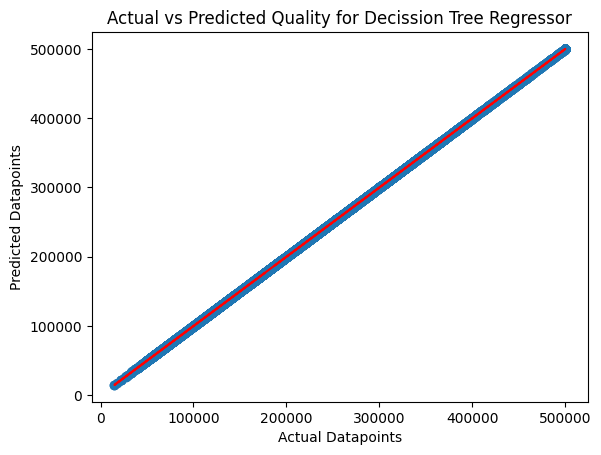

In [90]:

plt.scatter(y, y_pred)
plt.plot(y, y, 'r-') 
#plotting the Ground Truth Values

plt.xlabel('Actual Datapoints')
plt.ylabel('Predicted Datapoints')

plt.title('Actual vs Predicted Quality for Decission Tree Regressor')
plt.show()

In [91]:
tree_rmse = mean_squared_error(y, y_pred,squared = False)
tree_rmse

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

Overfitting results into Zero Error.

That can be overcome by:

-Regularizing it

-Increasing the Training Data

<p>
Upon comparision of scores of the two models, we can see that the LinearRegressor has better MSE and more precise estimation compared to DecisionTree.</p>



<h1 style="text-align:center; background-color: lightblue; color: black"> Cross Validation </h1>

The training set is divided into training set and a validation set which acts as a substitue for test dataset.

K-fold-Cross-Validation

This randomly splits the training set into 10 distinct subsets called folds, this trains and evaluates the Decision Tree Model 10 times, picking a different fold evaluation every time and training on the other 9 folds.

<h4><b>Randomized Search CV</b></h4>
It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.

It enables us to search hyperparameter space with appropriate budget control.

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [93]:
tree_rmse_scores

array([69469.29323249, 75265.6352651 , 66898.25510036, 64872.85895682,
       72907.46914811, 66663.53299537, 68301.22010797, 71226.3636975 ,
       68875.42725729, 67389.50573095])

In [94]:
# tree_rmse_scores2 = cross_val_score(tree_reg, X, y,
#                          scoring="neg_root_mean_squared_error", cv=10)
# tree_rmse_scores2

In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print(display_scores(tree_rmse_scores))
tree_rmse_scores.max(),tree_rmse_scores.min()

Scores: [69469.29323249 75265.6352651  66898.25510036 64872.85895682
 72907.46914811 66663.53299537 68301.22010797 71226.3636975
 68875.42725729 67389.50573095]
Mean: 69186.95614919564
Standard deviation: 2989.3329059611524
None


(75265.63526509528, 64872.858956824006)

In [96]:
lin_scores = cross_val_score(lin_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67925.80959681 71999.26592206 68901.56784759 65085.99987584
 69039.24578711 67036.81378049 70853.03611733 70783.96351569
 66923.40491897 68601.73544865]
Mean: 68715.08428105428
Standard deviation: 1990.2152675071768


In [97]:
X.shape

(16512, 13)

In [ ]:
forest_reg?

Object `forest_reg` not found.


<h4  style="text-align:center; background-color: lightblue; color: black">Random Forest Regressor  </h4>

-Random forest model builds multiple decision trees on randomly selected features and then average their predictions.

-Building a model on top of other model is called * ensemble learning * Which is often used to improve performance of ML models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 10, random_state=42)
forest_reg.fit(X, y)

RandomForestRegressor(max_features=10, random_state=42)

In [ ]:
forest_reg.predict(X)

array([187580., 131678., 279531., ..., 320688.,  98752., 182429.])

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, y,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48764.81852018 51054.10766079 47290.82474475 45127.78192071
 48510.51132539 45345.42343432 47941.72219899 52628.41715507
 48780.52654792 49112.17272152]
Mean: 48455.63062296401
Standard deviation: 2171.826066670377


In [ ]:
import time
t0 = time.time()

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': list(range(1,201)),
          'max_features': list(range(1,9))}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, params,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42,verbose=1)
rnd_search.fit(X, y)

print("Training time in mins:", (time.time()-t0)/60)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Training time in mins: 16.455239768822988


In [ ]:

rnd_search.cv_results_

{'mean_fit_time': array([29.65257082, 17.17211246, 12.54194703, 37.88803821, 31.29122148,
        20.96147127, 10.32000556,  9.68078051,  8.62783036,  9.85291114]),
 'std_fit_time': array([ 3.84465613,  1.1862152 ,  1.55789648, 15.15024161,  5.19496819,
         0.35526271,  0.94753838,  0.55886394,  0.27137759,  0.65472641]),
 'mean_score_time': array([0.49428883, 0.17436719, 0.18150034, 0.60993686, 0.38544593,
        0.29619002, 0.1433742 , 0.36012282, 0.21157694, 0.11786451]),
 'std_score_time': array([0.16073539, 0.01051519, 0.00863773, 0.52197655, 0.02086194,
        0.0379809 , 0.01412478, 0.01488263, 0.01854394, 0.00195418]),
 'param_n_estimators': masked_array(data=[127, 60, 61, 95, 131, 96, 45, 122, 67, 39],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[6, 8, 5, 7, 6, 6, 6, 1, 3, 7],
              mask=[False, False, Fa

In [ ]:
results = rnd_search.cv_results_
naam = list(zip(results['params'],results['mean_test_score']))
naam

[({'n_estimators': 127, 'max_features': 6}, -2397099477.5843725),
 ({'n_estimators': 60, 'max_features': 8}, -2420180657.1323175),
 ({'n_estimators': 61, 'max_features': 5}, -2430080568.956664),
 ({'n_estimators': 95, 'max_features': 7}, -2396671779.6750336),
 ({'n_estimators': 131, 'max_features': 6}, -2397020972.2974453),
 ({'n_estimators': 96, 'max_features': 6}, -2406857251.688988),
 ({'n_estimators': 45, 'max_features': 6}, -2433515668.5979714),
 ({'n_estimators': 122, 'max_features': 1}, -2869484265.4547796),
 ({'n_estimators': 67, 'max_features': 3}, -2508252530.4217596),
 ({'n_estimators': 39, 'max_features': 7}, -2430001862.3071074)]

In [ ]:
results['params'][results['mean_test_score'].argmax()]
# results['params'][results['rank_test_score']==1]

{'n_estimators': 95, 'max_features': 7}

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=95, random_state=42)

In [ ]:
feature_imp = rnd_search.best_estimator_.feature_importances_
X.columns[rnd_search.best_estimator_.feature_importances_.argmax()]
# feature_imp


'median_income'

In [ ]:
final_model = rnd_search.best_estimator_

In [102]:
#Saving our Model
# import joblib
# # joblib.dump(final_model, "final_model.pkl")
# # and later...
# final_model = joblib.load("final_model.pkl")
# final_model

<h4  style="text-align:center; background-color: lightblue; color: black"> One-Hot Encoding  </h4>

-Only one attribute will be equal to 1(hot) while the others will be 0 (cold).

-This gives a Sparse Matrix, storing a lot of zeroes causes, except a single 1 per row, slows down training and degrades performance.

-The .toarray() method forms a dense matrix i.e. stores only non-zero elements.

In [100]:
strat_testSet_cat = strat_testSet[['ocean_proximity']]  # Selecting the column to be one-hot encoded

strat_testSet_cat_1hot = cat_encoder.fit_transform(strat_testSet_cat)  # One-hot encoding

In [ ]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
strat_testSet.loc[:, cat_encoder.categories_[0]] = strat_testSet_cat_1hot.toarray()

print(strat_testSet.loc[:, cat_encoder.categories_[0]])


       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
17428        0.0     0.0     0.0       0.0         1.0
15123        1.0     0.0     0.0       0.0         0.0
14508        0.0     0.0     0.0       0.0         1.0
12599        0.0     1.0     0.0       0.0         0.0
9001         1.0     0.0     0.0       0.0         0.0
...          ...     ...     ...       ...         ...
16420        0.0     1.0     0.0       0.0         0.0
12195        1.0     0.0     0.0       0.0         0.0
10778        1.0     0.0     0.0       0.0         0.0
9836         1.0     0.0     0.0       0.0         0.0
6748         1.0     0.0     0.0       0.0         0.0

[4128 rows x 5 columns]


In [ ]:
dense_matrix = strat_testSet_cat_1hot.toarray()
dense_matrix


array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
strat_testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0
15123,-116.94,32.83,38.0,1701.0,317.0,872.0,304.0,3.7831,147800.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
14508,-117.20,32.86,4.0,4308.0,1095.0,1923.0,932.0,3.9356,267000.0,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0
12599,-121.49,38.53,42.0,1468.0,281.0,571.0,271.0,3.3906,124200.0,INLAND,0.0,1.0,0.0,0.0,0.0
9001,-118.34,33.99,47.0,1107.0,199.0,437.0,178.0,3.7344,179400.0,<1H OCEAN,1.0,0.0,0.0,0.0,0.0


In [ ]:
strat_testSet.drop("ocean_proximity", axis =1, inplace=True)


C:\Users\zahra hussain\AppData\Local\Temp\ipykernel_12372\1603667422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_testSet.drop("ocean_proximity", axis =1, inplace=True)


In [ ]:
strat_testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,0.0,0.0,0.0,0.0,1.0
15123,-116.94,32.83,38.0,1701.0,317.0,872.0,304.0,3.7831,147800.0,1.0,0.0,0.0,0.0,0.0
14508,-117.20,32.86,4.0,4308.0,1095.0,1923.0,932.0,3.9356,267000.0,0.0,0.0,0.0,0.0,1.0
12599,-121.49,38.53,42.0,1468.0,281.0,571.0,271.0,3.3906,124200.0,0.0,1.0,0.0,0.0,0.0
9001,-118.34,33.99,47.0,1107.0,199.0,437.0,178.0,3.7344,179400.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
strat_testSet.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        42
population             0
households             0
median_income          0
median_house_value     0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

In [103]:
# median = strat_testSet["total_bedrooms"].median()
strat_testSet.fillna(median,inplace=True)
strat_testSet.isna().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17836\4277435869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_testSet.fillna(median,inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
median

442.0

In [ ]:
# X_test = strat_testSet.drop("median_house_value", axis=1)
# y_test = strat_testSet["median_house_value"]

In [ ]:
strat_testSet_numeric = strat_testSet[strat_testSet.columns[:8]]
strat_testSet_numeric.head()

standardized = standardizer.transform(strat_testSet_numeric)

In [ ]:
standardized

array([[-0.43880484, -0.46790997, -1.00539266, ...,  0.06042239,
        -0.17364492,  0.21976938],
       [ 1.32028233, -1.31765449,  0.74573029, ..., -0.50291563,
        -0.51196149, -0.04575538],
       [ 1.19071783, -1.30364772, -1.96055063, ...,  0.46136493,
         1.14790417,  0.03452322],
       ...,
       [ 0.84189035, -0.93480256,  0.10895831, ..., -0.59558199,
        -0.3533756 , -0.24084553],
       [-1.1464263 ,  0.45653738, -0.68700667, ..., -0.41208426,
         0.04308913, -0.43783079],
       [ 0.7571751 , -0.72003197,  1.46209877, ..., -0.91853799,
        -0.90314003, -0.37502923]])

In [ ]:
strat_testSet_std = pd.DataFrame(standardized , columns = strat_testSet.columns[:8] , index = strat_testSet.index)
strat_testSet_std

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17428,-0.438805,-0.467910,-1.005393,-0.034818,-0.257061,0.060422,-0.173645,0.219769
15123,1.320282,-1.317654,0.745730,-0.430108,-0.525658,-0.502916,-0.511961,-0.045755
14508,1.190718,-1.303648,-1.960551,0.785129,1.356938,0.461365,1.147904,0.034523
12599,-0.947096,1.343633,1.064116,-0.538719,-0.612770,-0.779080,-0.599184,-0.252374
9001,0.622627,-0.776059,1.462099,-0.706997,-0.811193,-0.902023,-0.844992,-0.071392
...,...,...,...,...,...,...,...,...
16420,-0.847431,1.044822,-0.209428,-1.147969,-1.227397,0.111802,-1.236170,0.988865
12195,1.150852,-0.930134,-1.084989,0.908657,0.952833,1.002683,0.883594,-0.618602
10778,0.841890,-0.934803,0.108958,-0.461339,-0.390150,-0.595582,-0.353376,-0.240846
9836,-1.146426,0.456537,-0.687007,-0.368111,0.047832,-0.412084,0.043089,-0.437831


In [ ]:
strat_testSet[strat_trainSet.columns[:8]] = strat_testSet_std
strat_testSet.head()

C:\Users\ulhas\AppData\Local\Temp\ipykernel_12876\1453257259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_testSet[strat_trainSet.columns[:8]] = strat_testSet_std


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-0.438805,-0.467910,-1.005393,-0.034818,-0.257061,0.060422,-0.173645,0.219769,150700.0,0.0,0.0,0.0,0.0,1.0
15123,1.320282,-1.317654,0.745730,-0.430108,-0.525658,-0.502916,-0.511961,-0.045755,147800.0,1.0,0.0,0.0,0.0,0.0
14508,1.190718,-1.303648,-1.960551,0.785129,1.356938,0.461365,1.147904,0.034523,267000.0,0.0,0.0,0.0,0.0,1.0
12599,-0.947096,1.343633,1.064116,-0.538719,-0.612770,-0.779080,-0.599184,-0.252374,124200.0,0.0,1.0,0.0,0.0,0.0
9001,0.622627,-0.776059,1.462099,-0.706997,-0.811193,-0.902023,-0.844992,-0.071392,179400.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test = strat_testSet.drop("median_house_value", axis=1)

In [ ]:
y_test = strat_testSet["median_house_value"]

Randomized Search 

It evaluates a given no. of random combinations by selecting a random value for each hyperparameter at every iteration.

In [ ]:
model = rnd_search.best_estimator_
finalPred = model.predict(X_test)

In [ ]:
final_rmse = mean_squared_error(y_test, finalPred,squared = False)
final_rmse

47437.97182552229

In [ ]:
model

RandomForestRegressor(max_features=7, n_estimators=95, random_state=42)